<a href="https://colab.research.google.com/github/josephychin/sales-predictions/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Part 5 (Core)

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 5, your task is to use Linear Regression or KNN (or both!) to create a model to predict sales:

Use the data you have cleaned in previous weeks. This should not have any missing data and you should deal with categorical variables appropriately.

Here are some resources to use when dealing with categorical variables:

Dealing with categorical features in machine learning

Categorical Data

Here’s All you Need to Know About Encoding Categorical Data (with Python code)

The "Item_Outlet_Sales" column is your target. Build a model to predict this.

Evaluate your model.

Is there anything you can do to improve your model?

Which features are most associated with higher predicted sales?

Commit your work to GitHub. 

Turn in a link to your GitHub repo! We will finalize the project next week.

Here is the Data Dictionary for this dataset:

Variable Name	Description

Item_Identifier	Unique product ID

Item_Weight	Weight of product

Item_Fat_Content	Whether the product is low fat or regular

Item_Visibility	The percentage of total display area of all products in a store allocated to the particular product

Item_Type	The category to which the product belongs

Item_MRP	Maximum Retail Price (list price) of the product

Outlet_Identifier	Unique store ID

Outlet_Establishment_Year	The year in which store was established

Outlet_Size	The size of the store in terms of ground area covered

Outlet_Location_Type	The type of area in which the store is located

Outlet_Type	Whether the outlet is a grocery store or some sort of supermarket

Item_Outlet_Sales	Sales of the product in the particular store. This is the target variable to be predicted.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/PandasForDataManipulation/sales_predictions_cleaned.csv')
df.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [73]:
df.isna().sum()

Unnamed: 0                      0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [74]:
df['Outlet_Size'].fillna('NaN', inplace=True)

In [75]:
df.isna().sum()

Unnamed: 0                   0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [76]:
df.shape

(8523, 13)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Identifier            8523 non-null   object 
 2   Item_Weight                8523 non-null   float64
 3   Item_Fat_Content           8523 non-null   object 
 4   Item_Visibility            8523 non-null   float64
 5   Item_Type                  8523 non-null   object 
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [78]:
df = df.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [79]:
df.shape

(8523, 5)

In [80]:
df.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [98]:
X = df.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']].values

In [99]:
X.shape

(8523, 4)

In [108]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(int)

In [110]:
y = df.loc[:, 'Item_Outlet_Sales'].values

In [111]:
y.shape

(8523,)

In [112]:
reg = LinearRegression(fit_intercept=True)

In [113]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
reg.predict(X[0].reshape(-1,4))

array([4085.47402921])

In [115]:
reg.predict(X[0:10])

array([4085.47402921,  815.37450988, 2383.56777432, 3096.32993295,
       1259.08084009,  940.26982975, 1253.48849904, 1556.55899242,
       1653.74952294, 2657.67486466])

In [116]:
score = reg.score(X, y)
score

0.34232883861481245

In [117]:
reg.coef_

array([-1.86788028e+00, -4.38454039e+03,  1.55600867e+01, -1.26267007e+01])

In [118]:
reg.intercept_

25526.927343721938

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X);

In [120]:
knn = KNeighborsClassifier(n_neighbors=1)

In [121]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [122]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [127]:
predictions = knn.predict(X)

In [128]:
predictions

array([3735,  443, 2097, ..., 1193, 1845,  765])

In [129]:
score = knn.score(X, y)
score

1.0

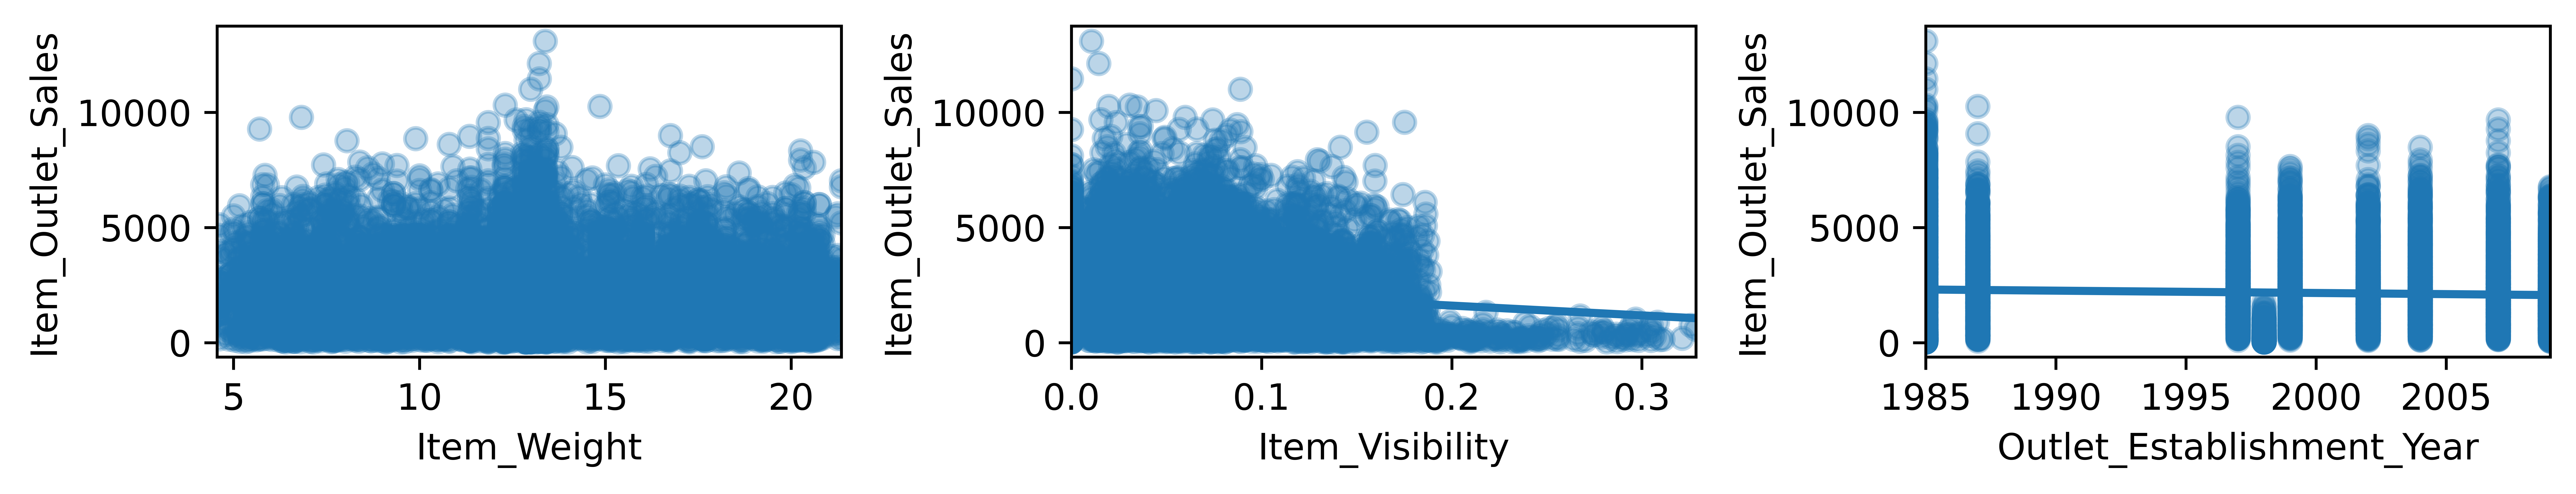

In [92]:
fig, axes = plt.subplots(nrows = 1,ncols =3, figsize = (10,2), dpi=1000)
sns.regplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.1 KB


In [49]:
df = df.loc[:, ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']]
df.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,249.8092,1999,3735.1380
1,5.92,48.2692,2009,443.4228
2,17.50,141.6180,1999,2097.2700
3,19.20,182.0950,1998,732.3800
4,8.93,53.8614,1987,994.7052


In [50]:
X = df.loc[:, ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']].values

In [51]:
y = df.loc[:, 'Item_Outlet_Sales'].values

In [52]:
reg = LinearRegression(fit_intercept=True)

In [53]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
reg.predict(X[0].reshape(-1,3))

array([3866.65854254])

In [55]:
reg.predict(X[0:10])

array([3866.65854254,  628.31490765, 2172.99858526, 2811.45223282,
        944.93080795,  671.61702223,  998.29686887, 1800.02916177,
       1447.9855221 , 2805.15080813])

In [56]:
score = reg.score(X, y)
score

0.32485223330205704

In [57]:
reg.coef_

array([ -1.21403611,  15.56230878, -10.60193663])

In [58]:
reg.intercept_

21183.612495688496

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_MRP                   8523 non-null   float64
 2   Outlet_Establishment_Year  8523 non-null   int64  
 3   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 266.5 KB


In [61]:
df = df.loc[:, ['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']]
df.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales
0,9.30,249.8092,3735.1380
1,5.92,48.2692,443.4228
2,17.50,141.6180,2097.2700
3,19.20,182.0950,732.3800
4,8.93,53.8614,994.7052


In [62]:
X = df.loc[:, ['Item_Weight', 'Item_MRP']].values

In [63]:
y = df.loc[:, 'Item_Outlet_Sales']

In [64]:
reg = LinearRegression(fit_intercept=True)

In [65]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
reg.predict(X[0].reshape(-1,2))

array([3877.59538407])

In [67]:
reg.predict(X[0:10])

array([3877.59538407,  746.172917  , 2186.20691529, 2814.0597674 ,
        830.04167483,  790.25034353,  884.22180323, 1664.25788451,
       1493.10104169, 2903.13300866])

In [68]:
score = reg.score(X, y)
score

0.3221473457790268

In [69]:
reg.coef_

array([-1.03555607, 15.55484096])

In [70]:
reg.intercept_

1.4836797854518409